In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_22.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_22.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [4]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

Peptide ID m/z: 585.265686035156
 - Peptide hit rank: 1
 - Peptide hit sequence: MGWFWADQK
Number of matched peaks: 9
ion	theo. m/z	observed m/z
y2+	1	275.171383168571	275.17401123046875
y7++	2	490.734879439721	491.02911376953125
b8++	2	511.7130897728209	511.213623046875
y8++	2	519.2456114875711	519.3346557617188
b4+	1	522.216953185671	522.187744140625
b6+	1	779.3333806641709	779.4964599609375
b7+	1	894.3603248236709	894.444091796875
y7+	1	980.4624824126709	980.5645141601562
y8+	1	1037.483946508371	1037.64599609375
Peptide ID m/z: 1104.58251953125
 - Peptide hit rank: 1
 - Peptide hit sequence: IIPILLEFMNNEFDSITAK
Number of matched peaks: 2
ion	theo. m/z	observed m/z
b9+	1	1070.6318559720712	1070.698486328125
y12+	1	1416.646400163471	1416.641845703125
Peptide ID m/z: 1094.063720703125
 - Peptide hit rank: 1
 - Peptide hit sequence: AFGIPVNTFSSEVVTLWYR
Number of matched peaks: 9
ion	theo. m/z	observed m/z
b12++	2	625.8062312906211	625.3438720703125
b17++	2	924.9801740243212	924.83972167

 - Peptide hit sequence: YHDGYGM(Oxidation)R
Number of matched peaks: 10
ion	theo. m/z	observed m/z
b2++	2	151.068397221971	151.32252502441406
y5++	2	300.133943437871	299.84326171875
b2+	1	301.12951797717096	301.15191650390625
y2+	1	322.154352930471	322.0721435546875
b6++	2	347.13499804097097	347.0726318359375
y3+	1	379.17581702617105	379.1721496582031
b3+	1	416.15646213667094	416.15362548828125
b7++	2	420.65269804952095	420.3752136230469
b4+	1	473.17792623237096	472.8040466308594
b7+	1	840.298119632271	840.1167602539062
Peptide ID m/z: 698.256408691406
 - Peptide hit rank: 1
 - Peptide hit sequence: VDDDEDEDNSDK
Number of matched peaks: 10
ion	theo. m/z	observed m/z
b4++	2	223.081899849571	223.21124267578125
y7++	2	411.65923271642095	412.1146545410156
b4+	1	445.15652323237094	445.2174072265625
y10++	2	591.207473987571	590.871337890625
y11++	2	648.720946067321	648.5682983398438
b6+	1	689.2260616151709	689.2220458984375
y6+	1	707.284244806571	707.5526733398438
b8+	1	933.295599997971	932

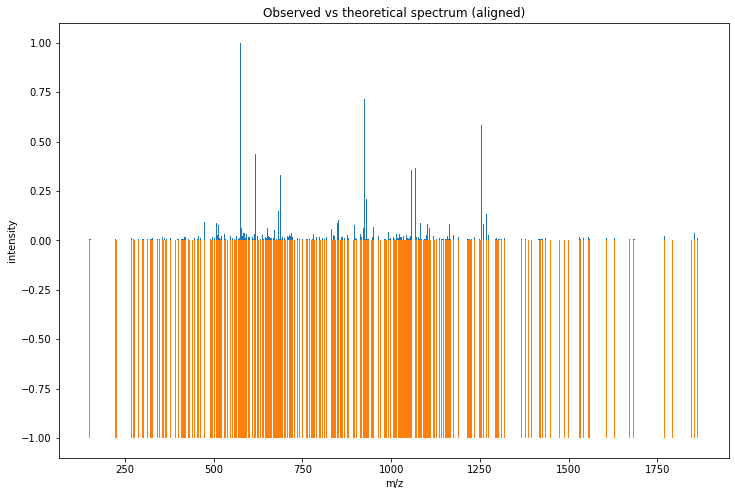

In [5]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:50]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())  
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)